In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sys
import os
import cmocean
import cmocean.cm as cmo

In [2]:
def namer(trial, alpha, wind):
    if wind == 1e-2:
        return  "./saved-outputs/log_alpha" + str(alpha) +\
                "_trial" + str(trial) + ".pkl"
    else:
        return "./saved-outputs/log_alpha" + str(alpha) +\
                "_trial" + str(trial) + "_wind" + str(wind) + ".pkl"

In [89]:
trials = [0,1,2,3,4,10]
trials = [3]
# trials = [2]
alphas = np.arange(0.0, 1., 0.1)
wind = 1e-1
logger = []
for trial in trials:
    for alpha in alphas:
        alpha = np.round(alpha, 2)
        fname = namer(trial, alpha, wind)
        if os.path.exists(fname):
            log = pd.read_pickle(fname)
            
            logger.append([trial, alpha, log.iloc[-1][1], log.iloc[-1][2]])

In [90]:
df = pd.DataFrame(logger)
df.columns = ['trial', 'alpha', 'tr_mse', 'te_mse']

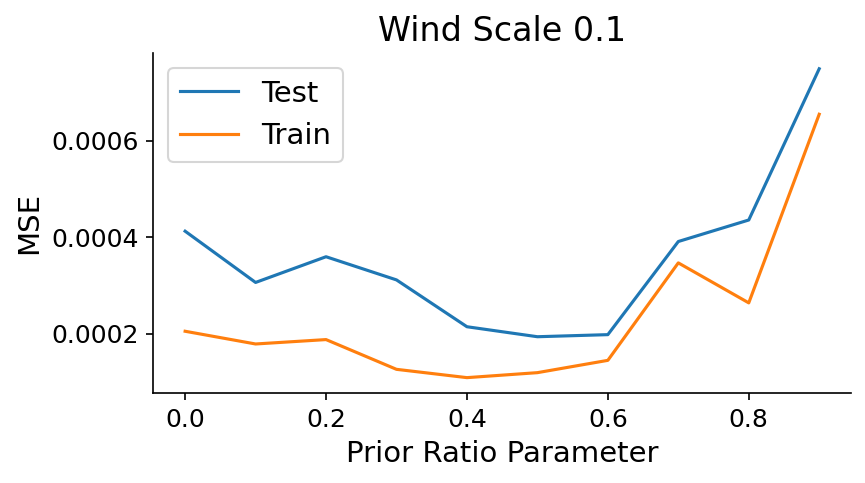

In [91]:
fs = 14

plt.figure(dpi=150, figsize=(6, 3))
sns.lineplot(x='alpha', y='te_mse', data=df, label="Test")
sns.lineplot(x='alpha', y='tr_mse', data=df, label='Train')
plt.title(r"Wind Scale " + str(wind), fontsize=fs+2)
plt.legend(fontsize=fs)
plt.xlabel("Prior Ratio Parameter", fontsize=fs)
plt.ylabel("MSE", fontsize=fs)
plt.tick_params('both', labelsize=fs-2)
sns.despine()
plt.savefig("./prior_ratio" + str(wind) + ".pdf", bbox_inches='tight')